In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Case Study: ABC Co.

ABC Co. has the following cost information for ten units of products.

Find the cost equation using:

- High-Low Method
- Least-Square Regression Method

In [2]:
ABC = pd.DataFrame({
        'Cost Activity': [1, 2, 2.5, 3, 3.5, 4, 5, 5, 5.5, 6],
        'Unit Cost': [3, 5, 5.5, 7, 9, 9, 11, 11.5, 12, 13]
}, index=list(range(1,11)))

ABC

,Cost Activity,Unit Cost
1,1.0,3.0
2,2.0,5.0
3,2.5,5.5
4,3.0,7.0
5,3.5,9.0
6,4.0,9.0
7,5.0,11.0
8,5.0,11.5
9,5.5,12.0
10,6.0,13.0


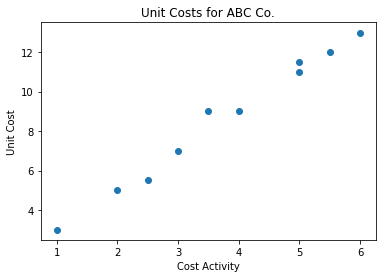

In [3]:
plt.scatter(ABC['Cost Activity'], ABC['Unit Cost'])
plt.title('Unit Costs for ABC Co.')
plt.xlabel('Cost Activity')
plt.ylabel('Unit Cost')
plt.show()

## High-Low Method

The high-low method uses the following formula to separate the fix and variable cost.

<h3><center>$\Large{Variable\ Cost\ per\ Unit\ = \ }\frac{Highest\ Cost - Lowest\ Cost}{Highest\ Driver - Lowest\ Driver}$</center></h3>

In [4]:
VC_per_unit = (ABC['Unit Cost'].max()  - ABC['Unit Cost'].min()) \
            / (ABC['Cost Activity'].max()  - ABC['Cost Activity'].min())

VC_per_unit

2.0

**Fixed Cost**

In [5]:
FC_highest = ABC['Unit Cost'].max() - (VC_per_unit * ABC['Cost Activity'].max())
FC_highest

1.0

In [6]:
FC_lowest = ABC['Unit Cost'].min() - (VC_per_unit * ABC['Cost Activity'].min())
FC_lowest

1.0

According to *High-Low Method*, the cost equation for ABC Co. is 

<h3><center>$\Large{Unit\ Cost\ =\ 2\ \times\ Cost\ Activity\ +\ 1}$</center></h3>

where 2 is the Variable Cost per unit, and 1 is the Fixed Cost.

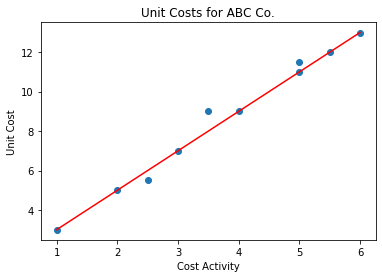

In [7]:
plt.scatter(ABC['Cost Activity'], ABC['Unit Cost'])
plt.title('Unit Costs for ABC Co.')
plt.xlabel('Cost Activity')
plt.ylabel('Unit Cost')
plt.plot(ABC['Cost Activity'], 2*ABC['Cost Activity']+1, 'r')
plt.show()